In [22]:
import pandas as pd
import latent_calendar as lc
import matplotlib.pyplot as plt

#base_df = pd.read_excel("base-data.xlsx")
# file_name = "base-data.xlsx"
# actor_vial_df = pd.read_excel(io=file_name, sheet_name='ACTOR_VIAL')
# vehiculos_df = pd.read_excel(io=file_name, sheet_name='VEHICULOS')
# siniestros_df = pd.read_excel(io=file_name, sheet_name='SINIESTROS')
# hipothesis_df = pd.read_excel(io=file_name, sheet_name='HIPOTESIS')


# save to csv's
actor_vial_df.to_csv("data/actor_vial.csv",index=0)
vehiculos_df.to_csv("data/vehiculos.csv",index=0)
siniestros_df.to_csv("data/siniestros.csv",index=0)
hipothesis_df.to_csv("data/hipothesis.csv",index=0)

In [26]:
actor_vial_df["ESTADO"].value_counts(normalize=1)

ESTADO
ILESO     0.769443
HERIDO    0.223280
MUERTO    0.007277
Name: proportion, dtype: float64

In [27]:
common_keys = ['CODIGO_ACCIDENTE','FECHA']
merged_inner = pd.merge(left=siniestros_df, right=hipothesis_df, left_on=common_keys, right_on=common_keys)
merged_inner["datetime"] = pd.to_datetime(merged_inner["FECHA"].str.cat(merged_inner["HORA"], sep=" "), format="mixed")

In [28]:
# " ".join(merged_inner["DIRECCION"][0].split()[:-1])
def clean_direccion(data):
     return " ".join(data.split()[:-1])
merged_inner['DIRECCION'] = merged_inner['DIRECCION'].apply(clean_direccion)

In [53]:
merged_inner["DIRECCION"].value_counts()

DIRECCION
KR 80-CL 2                         293
CL 13-KR 72                        269
AV AVENIDA CIUDAD DE CALI-CL 26    264
AV AVENIDA BOYACA-CL 13            261
CL 80-KR 72                        256
                                  ... 
KR 53C-CL 2B                         1
KR 52-CL 72                          1
KR 16-CL 86A                         1
AK 72-CL 1                           1
CL 142 - KR 146                      1
Name: count, Length: 57723, dtype: int64

In [54]:
df_2017 = merged_inner.loc[merged_inner["datetime"].between("2017-01-01","2017-12-31")]

<Axes: xlabel='CODIGO_LOCALIDAD'>

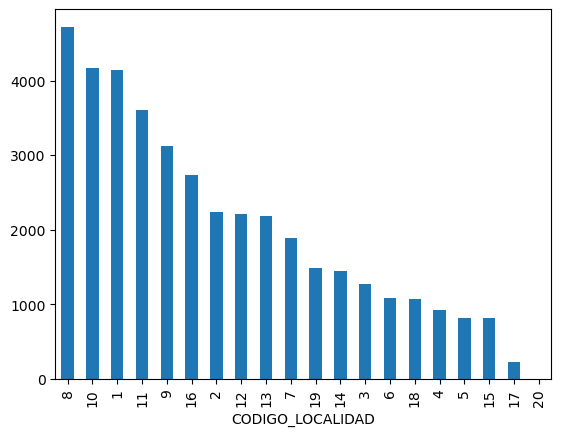

In [100]:
df_2017["CODIGO_LOCALIDAD"].value_counts(normalize=0).plot(kind="bar")

<Axes: xlabel='CODIGO_LOCALIDAD'>

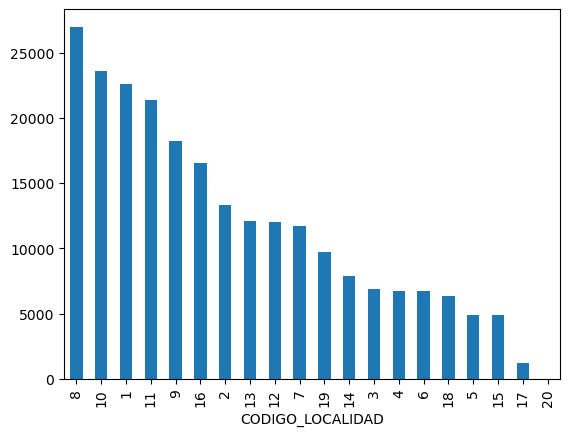

In [101]:
merged_inner["CODIGO_LOCALIDAD"].value_counts(normalize=0).plot(kind="bar")

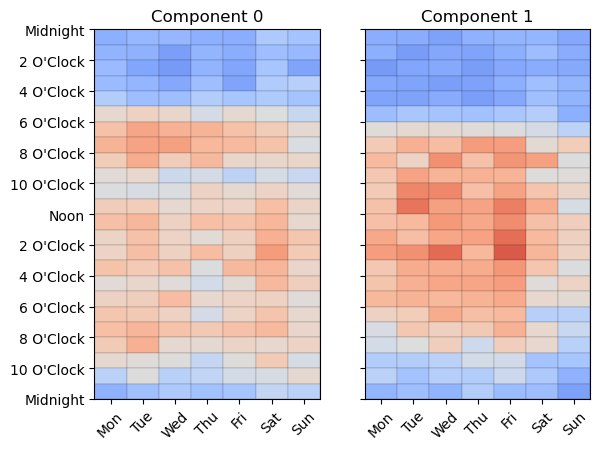

In [56]:
import warnings
warnings.filterwarnings("ignore")
df_location = df_2017.cal.aggregate_events("CODIGO_LOCALIDAD", "datetime")

model = lc.LatentCalendar(n_components=2, n_jobs=-1)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)

<Axes: xlabel='datetime'>

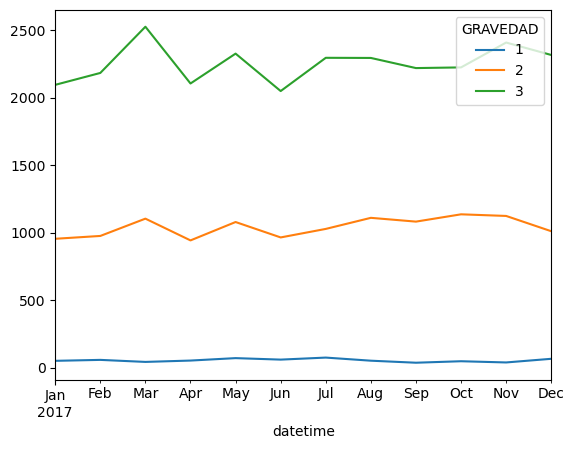

In [93]:
(
    df_2017
    .groupby([pd.Grouper(key="datetime", freq="M"), "GRAVEDAD"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)

<Axes: xlabel='datetime'>

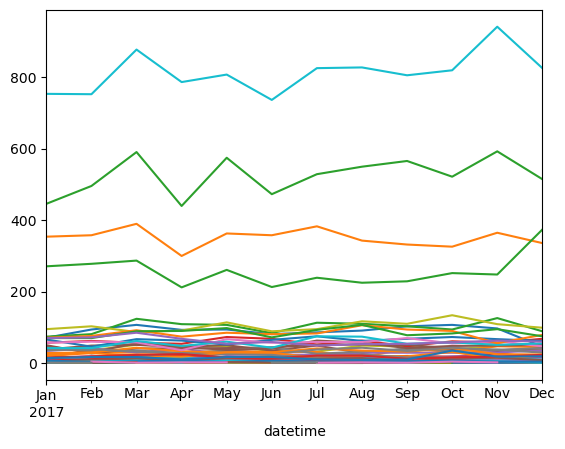

In [90]:
(
    df_2017
    .groupby([pd.Grouper(key="datetime", freq="M"), "CODIGO_CAUSA"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot(kind="line",legend=0)
)

In [ ]:
class CreditCard:
    def __init__(self, name: str, number: str, )